# Heart Disease Prediction using Machine Learning

**Steps involved:**

* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics.
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* Reporting what we've found - if we had to present our work, what would we show someone?

## 1. Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

*`Given clinical parameters about a patient, can we predict whether or not they have heart disease?`*

## 2. Data
What we'll want to do here is dive into the data our problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what we should expect.

The original data came from the **Cleveland database from UCI Machine Learning Repository**.

Howevever, we've downloaded it in a formatted way from **Kaggle**.

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

## 3. Evaluation

***If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.***

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features

### Heart Disease Data Dictionary

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. **age** - age in years

2. **sex** - (1 = male; 0 = female)

3. **cp** - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
    
4. **trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
    
5. **chol** - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
    
6. **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
    
7. **restecg** - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
    * can range from mild symptoms to severe problems
    * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
    * Enlarged heart's main pumping chamber
    
8. **thalach** - maximum heart rate achieved

9. **exang** - exercise induced angina (1 = yes; 0 = no)

10. **oldpeak** - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
    
11. **slope** - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
    
12. **ca** - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
    
13. **thal** - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
    
14. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

### Libraries Required

* **pandas** for data analysis.
* **NumPy** for numerical operations.
* **Matplotlib/seaborn** for plotting or data visualization.
* **Scikit-Learn** for machine learning modelling and evaluation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model Evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve

## Load Data


In [3]:
df = pd.read_csv("heart-disease.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration (exploratory data analysis or EDA)

The goal is to become a subject matter expert on the dataset we're working with. So when we start building models, we can sound check them to make sure they're not performing too well (overfitting) or why they might be performing poorly (underfitting).

Since EDA has no real set methodolgy, the following is a short check list we might want to walk through:

1. What question(s) are we trying to solve (or prove wrong)?
2. What kind of data do we have and how do we treat different types?
3. What’s missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Since these two values are close to even, our target column can be considered **balanced**. An **unbalanced** target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of our target classes have the same number of samples.

If we'd prefer these values in percentages, value_counts() takes a parameter, normalize which can be set to true.

In [5]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

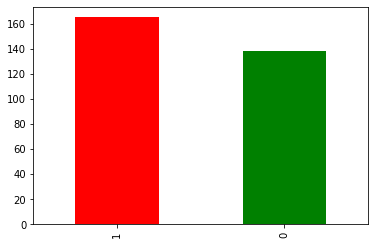

In [10]:
df.target.value_counts().plot(kind="bar", color = ["Red", "Green"]);

In [22]:
df.info(), df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
           count        mean        std    min    25%    50%    75%    max
 age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
 sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
 cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
 trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
 chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
 fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
 restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
 thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
 exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
 oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
 slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
 ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
 thal      303.0  

### Heart Disease Frequency according to Gender

If you want to compare two columns to each other, you can use the function **pd.crosstab(column_1, column_2)**.

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our target column with the sex column.

Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [23]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [25]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


What can we infer from this? Let's make a simple heuristic.

Since there are about 100 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a 75% chance she has heart disease.

As for males, there's about 200 total with around half indicating a presence of heart disease. So we might predict, if the participant is male, 50% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

This can be our very simple **baseline**, we'll try to beat it with machine learning.

### Making our crosstab visual

You can plot the crosstab by using the **`plot()`** function and passing it a few parameters such as, **kind** (the type of plot you want), **figsize=(length, width)** (how big you want it to be) and **color=[colour_1, colour_2]** (the different colours you'd like to use).

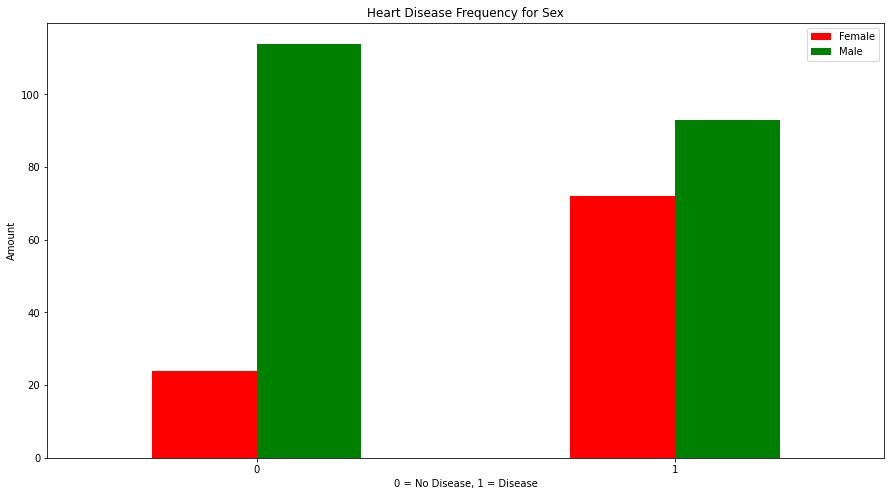

In [32]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(15,8),
                                    color=["red","green"]);

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

### Age vs Max Heart rate for Heart Disease
Let's try combining a couple of independent variables, such as, age and thalach (maximum heart rate) and then comparing them to our target variable heart disease.

Because there are so many different values for age and thalach, we'll use a scatter plot.

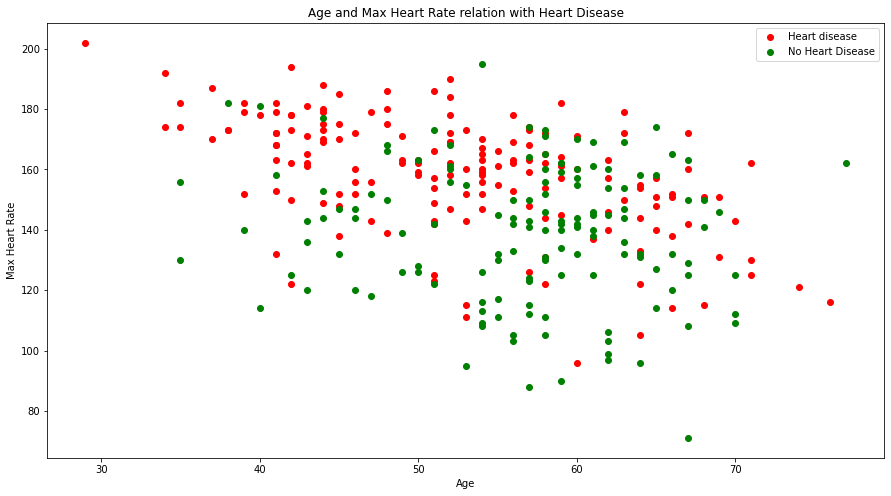

In [37]:
#Create a figure
plt.figure(figsize=(15,8))

#plot the positve values
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")

#plot the negative values
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="green")

#add information to the plot
plt.title("Age and Max Heart Rate relation with Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart disease", "No Heart Disease"])

What can we infer from this?

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more green dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

Let's check the age distribution.



<AxesSubplot:ylabel='Frequency'>

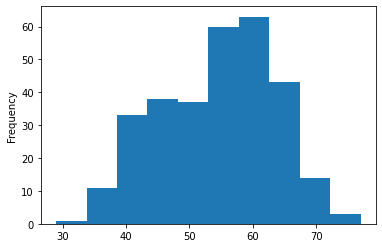

In [39]:
df.age.plot.hist()

### Heart Disease Frequency per Chest Pain Type
Let's try another independent variable. This time, cp (chest pain).

We'll use the same process as we did before with sex.

In [40]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


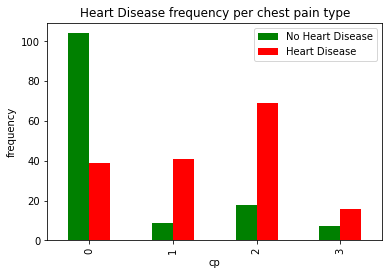

In [47]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   color=["green", "red"])

plt.title("Heart Disease frequency per chest pain type")
plt.ylabel("frequency")
plt.legend(["No Heart Disease", "Heart Disease"]);

1. **cp - chest pain type**
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

it's interesting the atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

### Correlation between independent variables
Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using `df.corr()` which will create a **correlation matrix** for us, in other words, a big table of numbers telling us how related each variable is the other.

In [48]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

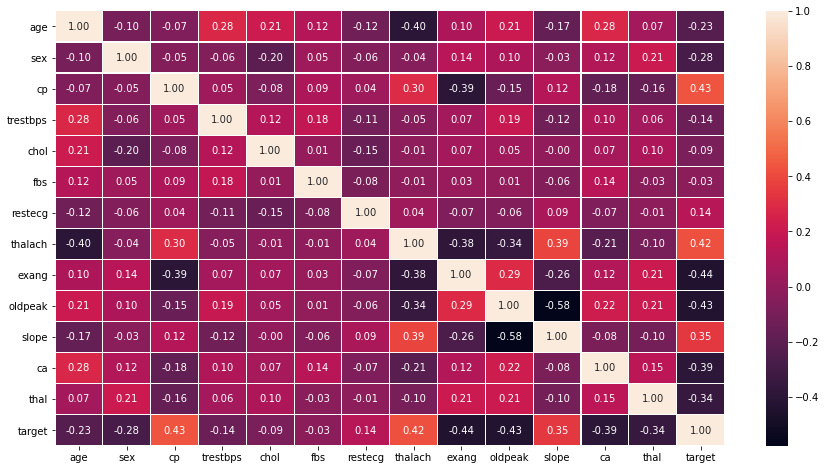

In [53]:
corr_matrix = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.15,
            fmt=".2f")

## 5. Modeling
We've explored the data, now we'll try to use machine learning to predict our target variable based on the 13 independent variables.

Remember our problem?

` ` Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

And remember our evaluation metric?

` ` If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

In [54]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df.target.values

In [58]:
X.head() #Feature Dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Training and test split
Now comes one of the most important concepts in machine learning, the training/test split.

This is where you'll split your data into a training set and a test set.



In [62]:
np.random.seed(42) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [64]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       dtype=int64),
 242)

In [65]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [66]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 61)

## Model choices
Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

* Logistic Regression - `LogisticRegression()`
* K-Nearest Neighbors - `KNeighboursClassifier()`
* RandomForest - `RandomForestClassifier()`

In [93]:
#put all the models in a dictionary
models = {"KNeighborClassifier": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=1000), 
          "RandomForestClassifier": RandomForestClassifier()}

#create a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    np.random.seed(80)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
        
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

print("Model Scores:\n")
for name, score in model_scores.items():
    print("{}\t:\t{}".format(name,score))

Model Scores:

KNeighborClassifier	:	0.6885245901639344
Logistic Regression	:	0.8524590163934426
RandomForestClassifier	:	0.8524590163934426


### Model Comparison

In [90]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T

,accuracy
KNeighborClassifier,0.688525
Logistic Regression,0.852459
RandomForestClassifier,0.852459


<AxesSubplot:>

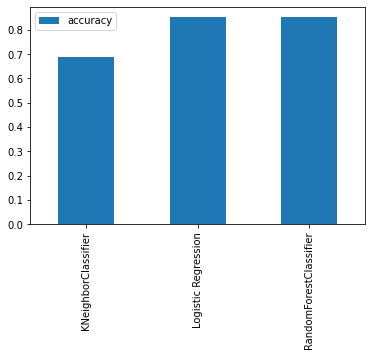

In [96]:
model_compare.T.plot.bar()

### Further Steps
* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* **Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* **Cross-validation** - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* **Precision** - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* **Recall** - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* **F1 score** - Combines precision and recall into one metric. 1 is best, 0 is worst.
* **Classification report** - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* **ROC Curve** - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
* **Area Under Curve (AUC)** - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

### Hyperparameter tuning and cross-validation

Here's the game plan:

1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

In [120]:
#create an array to store the score
score = []

#create the neighbors to be used for tuning
neighbors = np.arange(1,21)

for i in neighbors:
    #initiate the algorithm
    knn = KNeighborsClassifier(n_neighbors=i)
    
    #fit the model
    knn.fit(X_train, y_train)
    
    #score the model and add the score to list
    score.append(knn.score(X_test, y_test))
    
#display the scores
score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [123]:
#print the best acheived accuracy
print(f"Maximum KNN score on the test data: {max(score)*100:.2f}%")

Maximum KNN score on the test data: 75.41%


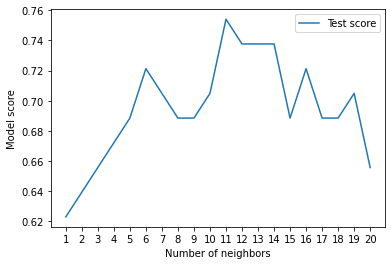

In [126]:
 plt.plot(neighbors, score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

Looking at the graph, **n_neighbors = 11** seems best.

Even knowing this, the KNN's model performance didn't get near what `LogisticRegression` or the `RandomForestClassifier` did.

Because of this, we'll discard KNN and focus on the other two.

### Tuning models with `RandomizedSearchCV`

In [128]:
#create param grids

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [129]:
# Setup random seed
np.random.seed(80)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [130]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [131]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [132]:
# Setup random seed
np.random.seed(80)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [133]:
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 10,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [134]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Tuning a model with GridSearchCV
The difference between RandomizedSearchCV and GridSearchCV is where RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations, GridSearchCV will test every single possible combination.

In short:

* RandomizedSearchCV - tries n_iter combinations of hyperparameters and saves the best.
* GridSearchCV - tries every single combination of hyperparameters and saves the best.

In [135]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [136]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [137]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

### Evaluating a classification model, beyond accuracy

* ROC curve and AUC score - plot_roc_curve()
* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()

In [138]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [139]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [140]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### ROC Curve and AUC Scores
What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

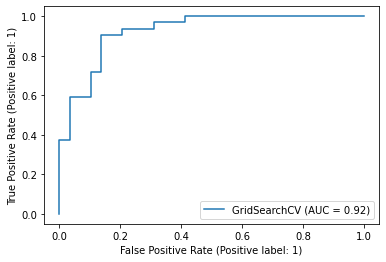

In [141]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

### Confusion matrix
A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using confusion_matrix() and passing it the true labels and predicted labels.

In [142]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


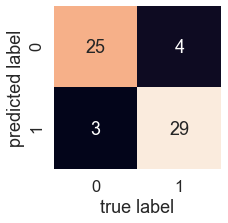

In [143]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

### Classification report
We can make a classification report using classification_report() and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [144]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

### Cross Validation

In [152]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

# Cross-validated accuracy score
cv_acc = np.mean(cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy")) # accuracy as scoring
cv_acc

0.8479781420765027

In [148]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [149]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [150]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

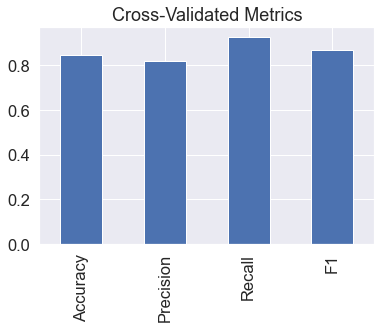

In [153]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);


### Feature importance
Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"



In [154]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [155]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [156]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

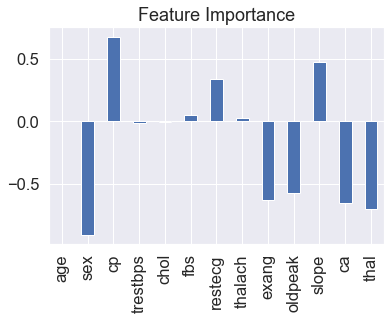

In [157]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

We were able to achieve an **accuracy** of **84.79% recall** of **92.72%** **precision** of **82.15%** and **f1 score** of **87.05%**  on our dataset. The score could be improved by collecting more data. Due to the project not being able to acheive the desired score of **95% accuracy** it will be dropped for now. Further improvements can be made to the machine learning model if more data is acquired.